In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [3]:
# Q1: read data into a dataframe from https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv
flight = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')
# show the first 5 records
flight.head(5)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [7]:
# which different years of data are in the dataframe?
flight.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [8]:
# show the total number of passengers per year as a table
flight.groupby('year').sum()

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


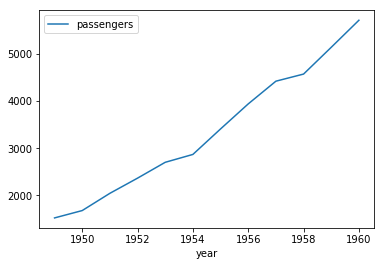

In [14]:
# draw a line graph for the sum of passengers by year
flight.groupby('year').sum().plot()

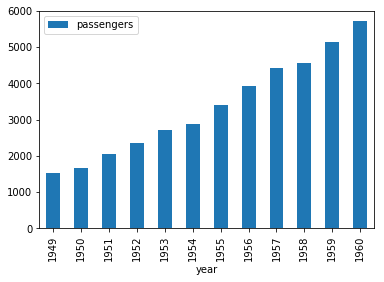

In [16]:
# draw a bar graph for the sum of passengers by year
flight.groupby('year').sum().plot.bar()

In [64]:
# what is the maximum number of passengers and by which year and month?
maxpass = flight.passengers.max()
print(maxpass)
rec = flight[flight.passengers == maxpass]
print(rec.iloc[0].month,rec.iloc[0].year)

622
July 1960


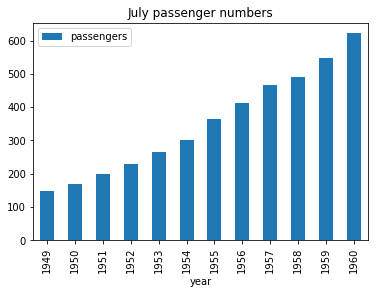

In [80]:
# july passenger numbers by year in a abar graph
flight[flight.month == 'July'].plot.bar(x='year',title='July passenger numbers')

In [97]:
# what is the passenger increase ratio from july 1949 to july 1960
increase = (flight[(flight.month == 'July') & (flight.year == 1960)].iloc[0].passengers / flight[(flight.month == 'July') & (flight.year == 1949)].iloc[0].passengers)
print(int(increase*100),'%')

420 %


In [100]:
# create a dataframe 'summer' of only summer months (june/july/august), how many records are in the dataframe now?
summer = flight[(flight.month == 'June') | (flight.month == 'July') | (flight.month == 'August')]
summer.count()

year          36
month         36
passengers    36
dtype: int64

In [109]:
dmon = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
# using dmon, add a columns 'mon' to flight that is numeric month for each month column value
flight['mon'] = [dmon[x] for x in flight.month ]
flight.head()

,year,month,passengers,mon
0,1949,January,112,1
1,1949,February,118,2
2,1949,March,132,3
3,1949,April,129,4
4,1949,May,121,5
